#### (1)-
##### Label encoding assigns an unique numerical value/label to each category of the categorical variable based on alphabetical order or frequncy of the categories. But label encoding makes the model biased to think that the category encoded with a higher numerical value is important than a category encoded with lower numerical value. So, label encoding should be used for nominal type data which don't have rank. 
##### Ordinal encoding is used to encode categorical data that have an intrinsic order or ranking. In this technique each category is assigned a numerical value based on its position in the order. 
##### Label encoding is used for target variable which is categorical. Ordinal encoding is used for categorical features.
##### Example- If we have a dataset with size as a categorical variable, then we should use ordinal encoding because here the categories like small, medium, large all are ordinal data types i.e. they can be ranked.

In [1]:
import pandas as pd
df= pd.DataFrame({"size": ["small", "medium", "large", "medium", "small", "large"]})
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [3]:
# creating instance of OrdinalEncoder-
from sklearn.preprocessing import OrdinalEncoder
or_encoder= OrdinalEncoder(categories=[["small", "medium", "large"]])

#performing fit and transform-
or_encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

#### (2)-
##### Target Guided Ordinal Encoding is a technique used to encode categorical variable based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories. We replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable which can improve the predictive power of our model.

In [4]:
# example-
# creating a sample data frame-
import pandas as pd
df1= pd.DataFrame({"city": ["New York", "London", "Paris", "Tokyo", "New York", "Paris"],
                   "price": [200, 150, 300, 250, 180, 320]})
df1

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [6]:
df1.groupby("city")["price"].mean()

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [7]:
mean_price= df1.groupby("city")["price"].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [8]:
df1["city_encoded"]= df1["city"].map(mean_price)
df1

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [9]:
# so instead of the city categorical column we will now use city_encoded column to train our ML model.

#### (3)-
##### Covariance ia a measure of joint variability of 2 random variables. Covariance is a measure of the relationship between two random variables and to what extent, they change together. It is important because it helps us in understanding the relationship between the random variables. The numerical value of covariance has no importance; only the sign is relevant.
- If cov(X, Y) is greater than zero, then we can say that the covariance for any two variables is positive and both the variables move in the same direction.
- If cov(X, Y) is less than zero, then we can say that the covariance for any two variables is negative and both the variables move in the opposite direction.
- If cov(X, Y) is zero, then we can say that there is no relation between two variables.
##### Cov(X,Y)= ∑(xi - xbar ) × (yi - ybar)/ (N - 1)

#### (4)-

In [10]:
import pandas as pd
df2= pd.DataFrame({"Color": ["red", "green", "blue"], "Size": ["small", "medium", "large"], 
                   "Material": ["wood", "metal", "plastic"]})
df2

,Color,Size,Material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [14]:
# create instance of LabelEncoder-
from sklearn.preprocessing import LabelEncoder
lbl_encoder= LabelEncoder()

#perform fit and transform-
Color_encoded= lbl_encoder.fit_transform(df2[["Color"]])
Color_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 0])

In [28]:
# so the colors are encoded alphabetically, blue-0, green=1, red=2

In [15]:
Size_encoded= lbl_encoder.fit_transform(df2[["Size"]])
Size_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 0])

In [29]:
# so the sizes are encoded alphabetically, large=0, medium=1, small= 2

In [16]:
Material_encoded= lbl_encoder.fit_transform(df2[["Material"]])
Material_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1])

In [30]:
# so the materials are encoded alphabetically, metal=0, plastic=1, wood=2

#### (5)-

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age= [20, 25, 24, 32, 40, 50]
income= [20000, 50000, 45000, 60000, 70000, 85000]
education_level= ["B.Tech", "M.Tech", "M.Sc.", "B.Tech", "PhD", "B.Tech"]
dict= {"age": age, "income": income, "education_level": education_level}
df3= pd.DataFrame(dict)
df3

,age,income,education_level
0,20,20000,B.Tech
1,25,50000,M.Tech
2,24,45000,M.Sc.
3,32,60000,B.Tech
4,40,70000,PhD
5,50,85000,B.Tech


In [15]:
# first we convert the categorical variable to numerical-
from sklearn.preprocessing import OrdinalEncoder
ord_encoder= OrdinalEncoder(categories=[["B.Tech", "M.Sc.", "M.Tech", "PhD"]])
ed_level_encoded= ord_encoder.fit_transform(df3[["education_level"]])
ed_level_encoded

array([[0.],
       [2.],
       [1.],
       [0.],
       [3.],
       [0.]])

In [16]:
ed_level_df= pd.DataFrame(ed_level_encoded, columns=["ed_level_encoded"])
df4= pd.concat([df3, ed_level_df], axis=1)
df4

,age,income,education_level,ed_level_encoded
0,20,20000,B.Tech,0.0
1,25,50000,M.Tech,2.0
2,24,45000,M.Sc.,1.0
3,32,60000,B.Tech,0.0
4,40,70000,PhD,3.0
5,50,85000,B.Tech,0.0


In [17]:
df5= df4.drop("education_level",axis=1)
df5

,age,income,ed_level_encoded
0,20,20000,0.0
1,25,50000,2.0
2,24,45000,1.0
3,32,60000,0.0
4,40,70000,3.0
5,50,85000,0.0


In [22]:
data= np.array([df5["age"], df5["income"], df5["ed_level_encoded"]])
data

array([[2.0e+01, 2.5e+01, 2.4e+01, 3.2e+01, 4.0e+01, 5.0e+01],
       [2.0e+04, 5.0e+04, 4.5e+04, 6.0e+04, 7.0e+04, 8.5e+04],
       [0.0e+00, 2.0e+00, 1.0e+00, 0.0e+00, 3.0e+00, 0.0e+00]])

In [23]:
# now we find the covariance matrix-
cov_matrix= np.cov(data, bias=True)
cov_matrix

array([[1.07472222e+02, 1.99166667e+05, 5.00000000e-01],
       [1.99166667e+05, 4.16666667e+08, 4.16666667e+03],
       [5.00000000e-01, 4.16666667e+03, 1.33333333e+00]])

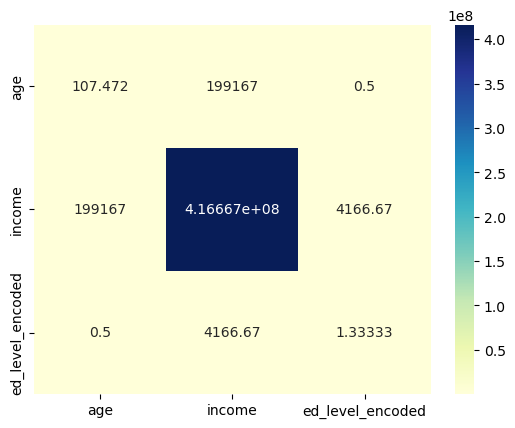

In [26]:
labs=["age", "income", "ed_level_encoded"]
sns.heatmap(cov_matrix, annot=True, fmt="g", xticklabels= labs, yticklabels= labs, cmap='YlGnBu')
plt.show()

#### (6)-
##### For the Gender categorical variable which has 2 unique categories- Male and Female, we will use One Hot Encoding because it will create 2 new columns for the 2 categories and assign them binary vectors. 
##### For the Educational level categorical variable which has 4 unique categories- High School, Bachelor's, Master's, PhD we will use Ordinal Encoding because these are ordinal type data and can be ranked, so High School will be assigned 0, Bachelor's will be assigned 1, Master's will be assigned 2 and PhD will be assigned 3.
##### For Employment Status categorical variable which has 3 unique categories- Unemployed, Part-time, Full-time we will use ordinal encoding as these categories can be ranked, Unemployed is assigned 0, Part-time is assigned 1, Full-time is assigned 2. 

#### (7)-

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

temperatue= [30.5, 29.2, 45.3, 40.9]
humidity= [85, 70, 50, 68]
weather_condition= ["rainy", "cloudy", "sunny", "sunny"]
wind_direction= ["north", "south", "west", "east"]
dict1= {"temp": temperatue, "humidity": humidity, "weather": weather_condition, "wind_dir": wind_direction}
df6= pd.DataFrame(dict1)
df6

,temp,humidity,weather,wind_dir
0,30.5,85,rainy,north
1,29.2,70,cloudy,south
2,45.3,50,sunny,west
3,40.9,68,sunny,east


In [34]:
# encoding weather using target guided ordinal encoding-
df6.groupby("weather")["temp"].mean()

weather
cloudy    29.2
rainy     30.5
sunny     43.1
Name: temp, dtype: float64

In [35]:
mean_val= df6.groupby("weather")["temp"].mean().to_dict()
mean_val

{'cloudy': 29.2, 'rainy': 30.5, 'sunny': 43.099999999999994}

In [37]:
df6["weather_encoded"]= df6["weather"].map(mean_val)
df7= df6.drop("weather", axis=1)
df7

,temp,humidity,wind_dir,weather_encoded
0,30.5,85,north,30.5
1,29.2,70,south,29.2
2,45.3,50,west,43.1
3,40.9,68,east,43.1


In [39]:
# encoding wind_dir using Label encoding-
from sklearn.preprocessing import LabelEncoder
lbl_encoder= LabelEncoder()
wind_encoded= lbl_encoder.fit_transform(df7[["wind_dir"]])
wind_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 2, 3, 0])

In [41]:
wind_encoded_df= pd.DataFrame(wind_encoded, columns=["wind_dir_encoded"])
df8= pd.concat([df7, wind_encoded_df], axis=1).drop("wind_dir", axis=1)
df8

,temp,humidity,weather_encoded,wind_dir_encoded
0,30.5,85,30.5,1
1,29.2,70,29.2,2
2,45.3,50,43.1,3
3,40.9,68,43.1,0


In [42]:
data1= np.array([df8["temp"], df8["humidity"], df8["weather_encoded"], df8["wind_dir_encoded"]])
data1

array([[30.5, 29.2, 45.3, 40.9],
       [85. , 70. , 50. , 68. ],
       [30.5, 29.2, 43.1, 43.1],
       [ 1. ,  2. ,  3. ,  0. ]])

In [44]:
# now we find covariance matrix-
cov_matrix1= np.cov(data1, bias=True)
cov_matrix1

array([[ 46.521875, -68.74375 ,  44.101875,   1.4875  ],
       [-68.74375 , 154.1875  , -58.84375 ,  -8.625   ],
       [ 44.101875, -58.84375 ,  44.101875,  -0.1625  ],
       [  1.4875  ,  -8.625   ,  -0.1625  ,   1.25    ]])

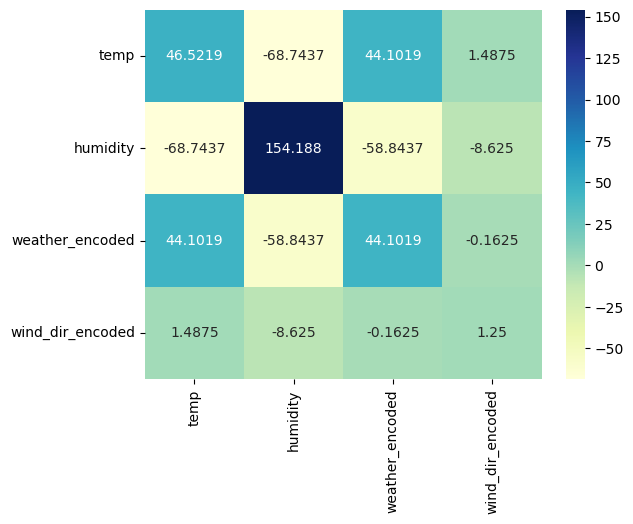

In [45]:
labs=["temp", "humidity", "weather_encoded", "wind_dir_encoded"]
sns.heatmap(cov_matrix1, annot=True, fmt="g", xticklabels= labs, yticklabels= labs, cmap='YlGnBu')
plt.show()